##**Testing Cutomer flow**

---



---



input dataCSV

In [ ]:
import os
from google.colab import files
# uploaded = files.upload()
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import pandas as pd
import numpy as np


In [ ]:

from google.colab import drive
# drive.mount('/content/drive')
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()


In [ ]:
from google.colab import drive
# drive = GoogleDrive(gauth)
# drive.mount('/content/sample_data')
drive.mount('/content/gdrive', force_remount=True)
dtrain = '/content/gdrive/MyDrive/ColabNotebooks/train&test/Data Train.csv'
dt = pd.read_csv(dtrain)
dtest = '/content/gdrive/MyDrive/ColabNotebooks/train&test/Data Test.csv'
dtst = pd.read_csv(dtest)

Mounted at /content/gdrive


#**Explanatory Data Analysis**

Look For Missing Value

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
dtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
dt.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
dtst.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
dtst.drop(columns=['id'])

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


Check Unique value

In [ ]:
for column in dt.columns:
    print('Column: {} - Unique Values: {}'.format(column, dt[column].unique()))

Column: state - Unique Values: ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
Column: account_length - Unique Values: [107 137  84  75 121 147 117 141  65  74 168  95 161  85  76  73  77 130
 111 132  57  54  20  49  12  36  78 136  98 135  34 160  64  59 142  97
  52  60  10  96  81 125 174 116 149  38  40  43 113 126 150 138 162  90
  50  82 144  46  70 128  94 155  80  99 120 108 122  93 157  63  41 193
  61  92 163  91 127 110 103 145  56 151  83 139   6 115  62 185 148  32
  68  25 179  67  19 170 106  51 118 208 131  53 105  66  35  88 123  45
 100 215  22  33  86 114  24 119 101 146 143  48 167  89 199 166 158 196
 112 209  16  39 104 129  55  44  79 159 194  87  21 133 224 140  58 109
  71  72 124 102 165  18  30 190  47 152  26  69  31 186 171  28 153 172
 169  13 189

In [ ]:
dt.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [ ]:

for i in dt.columns:
    print(i, '____________', len(dt[i].value_counts()))

state ____________ 51
account_length ____________ 215
area_code ____________ 3
international_plan ____________ 2
voice_mail_plan ____________ 2
number_vmail_messages ____________ 46
total_day_minutes ____________ 1843
total_day_calls ____________ 120
total_day_charge ____________ 1843
total_eve_minutes ____________ 1773
total_eve_calls ____________ 123
total_eve_charge ____________ 1572
total_night_minutes ____________ 1757
total_night_calls ____________ 128
total_night_charge ____________ 992
total_intl_minutes ____________ 168
total_intl_calls ____________ 21
total_intl_charge ____________ 168
number_customer_service_calls ____________ 10
churn ____________ 2


In [ ]:
dt.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
dt.isnull().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [ ]:
cat_dt = dt.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
cat_dt

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [ ]:
dt[cat_dt] = dt[cat_dt].apply(pd.Categorical)
# dtst[categorical_datatrain] = dtst[categorical_datatrain].apply(pd.Categorical)

Analyzing via plotting

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import seaborn as sns


Text(0, 0.5, 'Total')

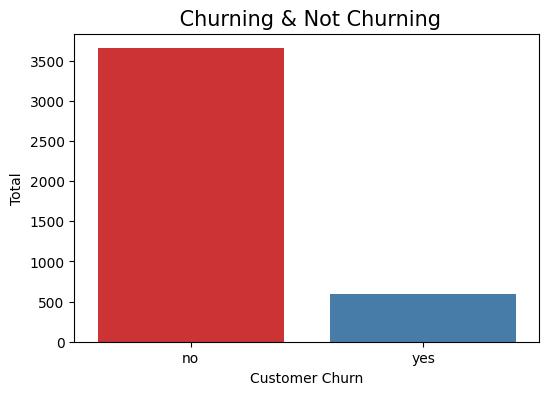

In [ ]:
#count churning and not chrning
plt.figure(figsize=(6,4))
sns.countplot(x = dt.churn,  palette='Set1')
plt.title(' Churning & Not Churning', fontsize=15)
plt.xlabel('Customer Churn',fontsize=10)
plt.ylabel('Total',fontsize=10) 

<Axes: title={'center': 'Churning Based on Customer Service calss'}, xlabel='number_customer_service_calls', ylabel='count'>

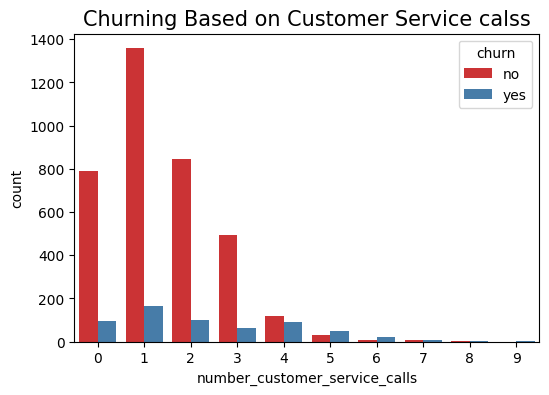

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Churning Based on Customer Service calss', fontsize=15)
sns.countplot(x='number_customer_service_calls', hue='churn', data=dt, palette="Set1")

<Axes: title={'center': ' Churning Based on Area Code'}, xlabel='area_code', ylabel='count'>

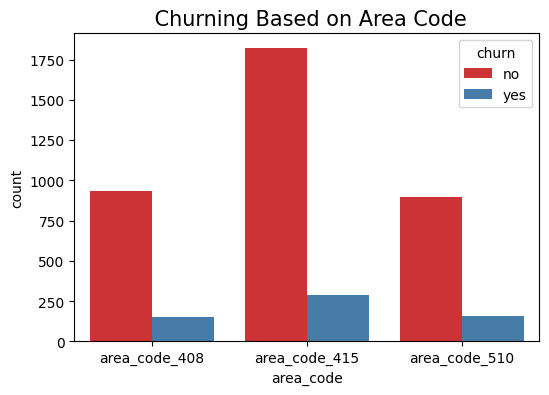

In [ ]:
plt.figure(figsize=(6,4))
plt.title(' Churning Based on Area Code', fontsize=15)
sns.countplot(x='area_code', hue='churn', data=dt, palette="Set1")

<Axes: xlabel='voice_mail_plan', ylabel='count'>

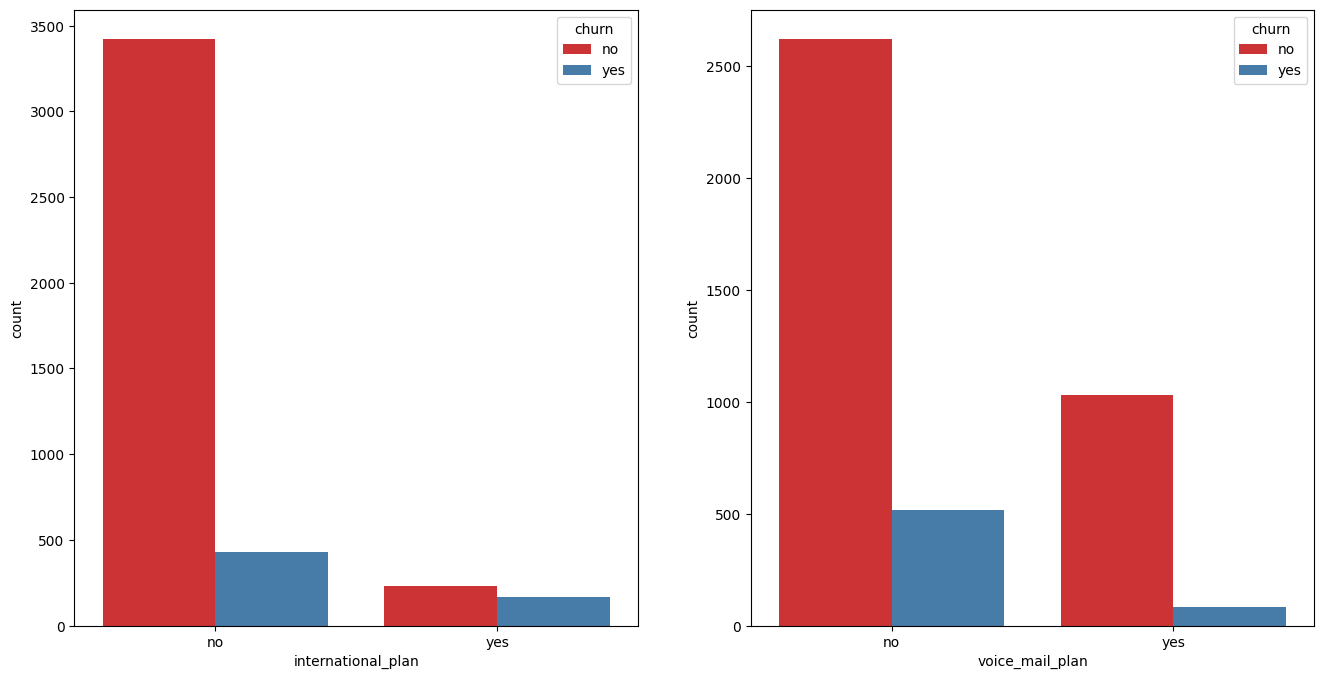

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
sns.countplot(x='international_plan', hue='churn', data=dt, ax=ax[0], palette="Set1")
sns.countplot(x='voice_mail_plan', hue='churn', data=dt, ax=ax[1], palette="Set1")

<Axes: xlabel='state'>

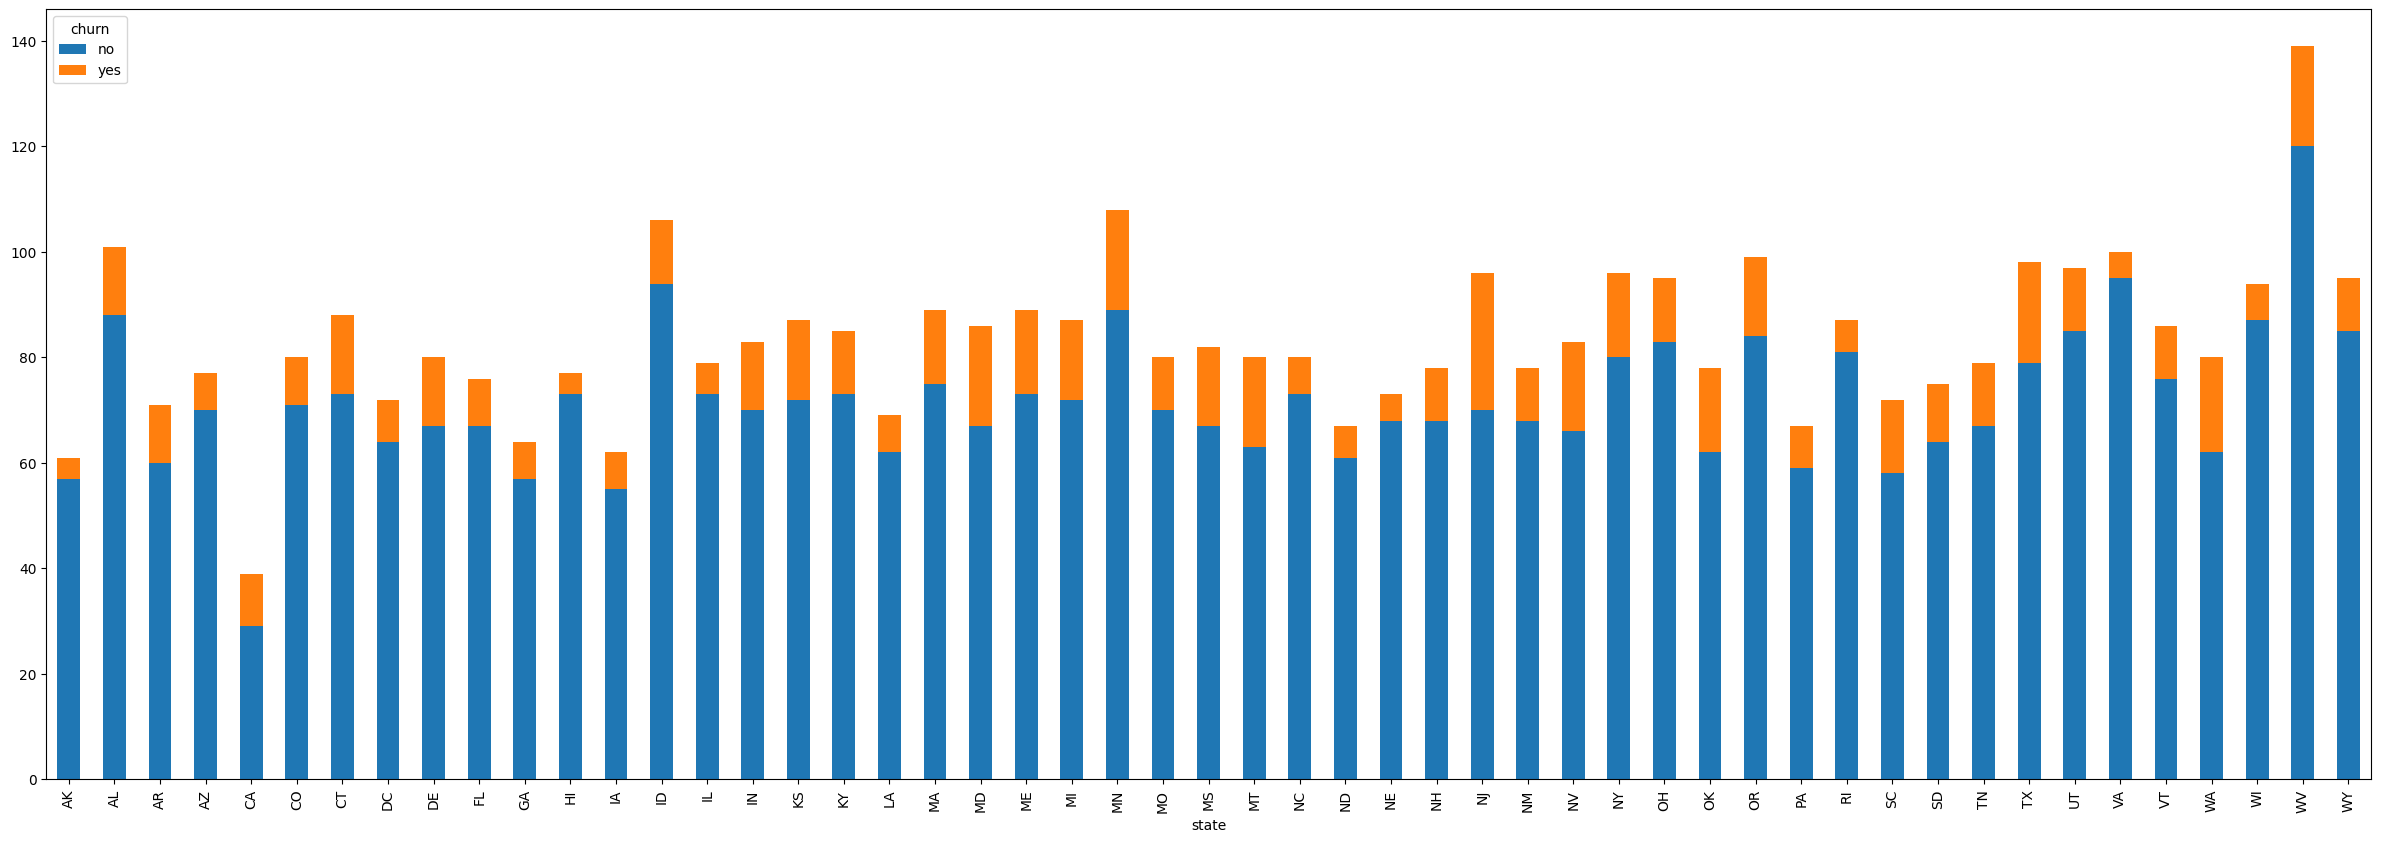

In [ ]:
dt.groupby(['state','churn']).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

For Numerical(continous and Discreat)

In [ ]:
non_cat = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_eve_minutes', 
          'total_eve_calls', 'total_night_minutes', 'total_night_calls', 'total_intl_minutes', 
          'total_intl_calls','number_customer_service_calls']

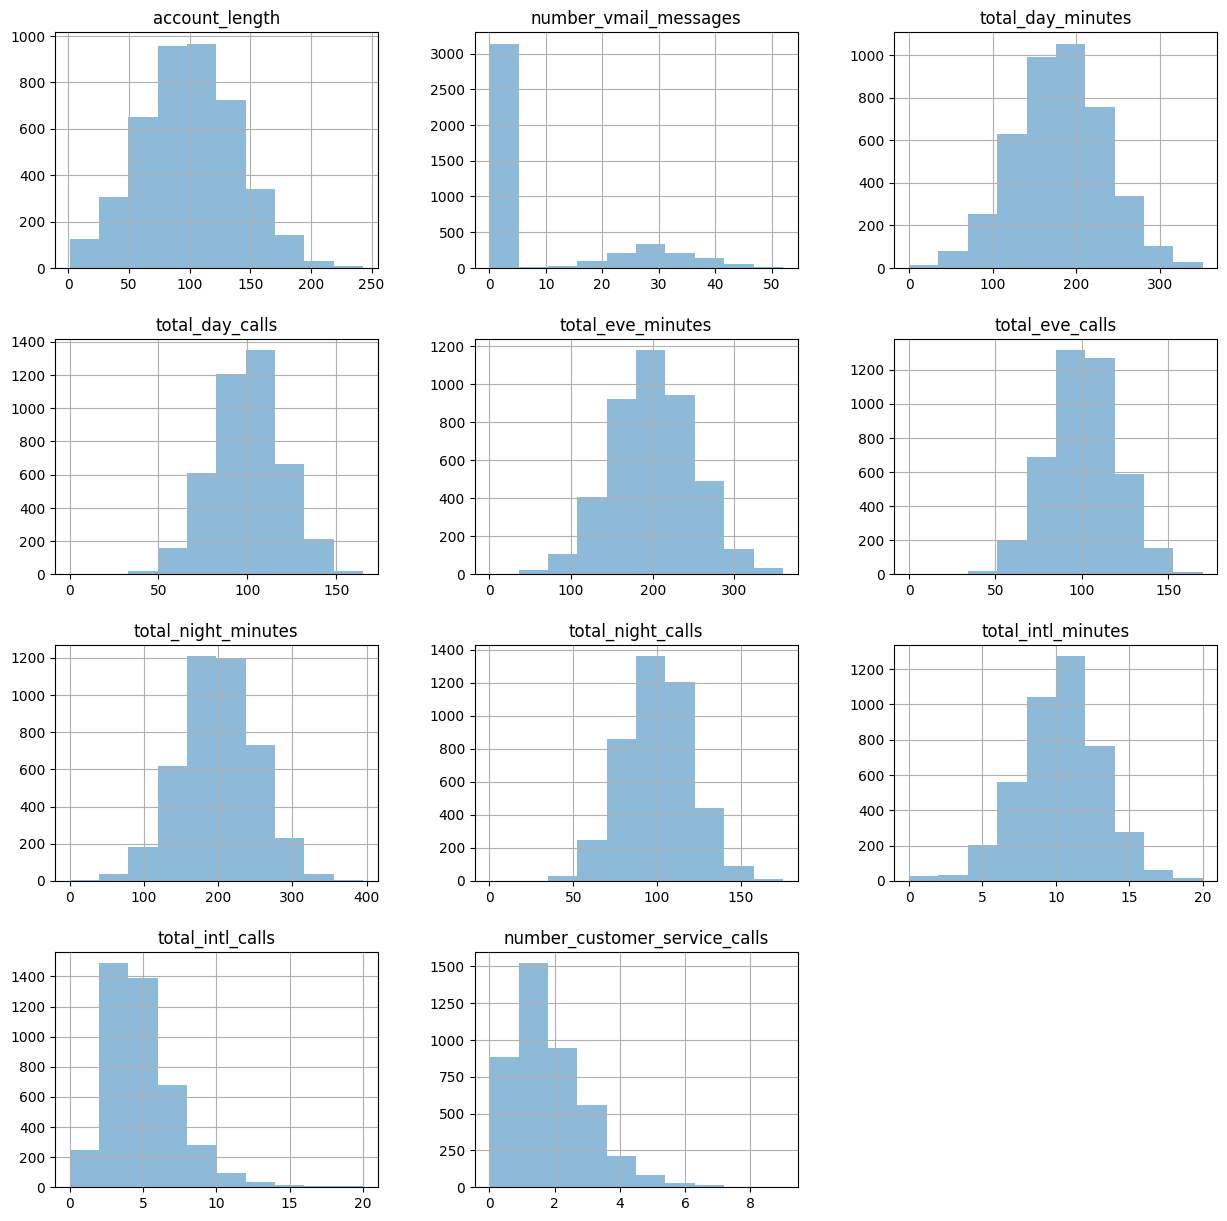

In [ ]:
dt[non_cat].hist(figsize=(15,15), alpha=0.5)
plt.show()

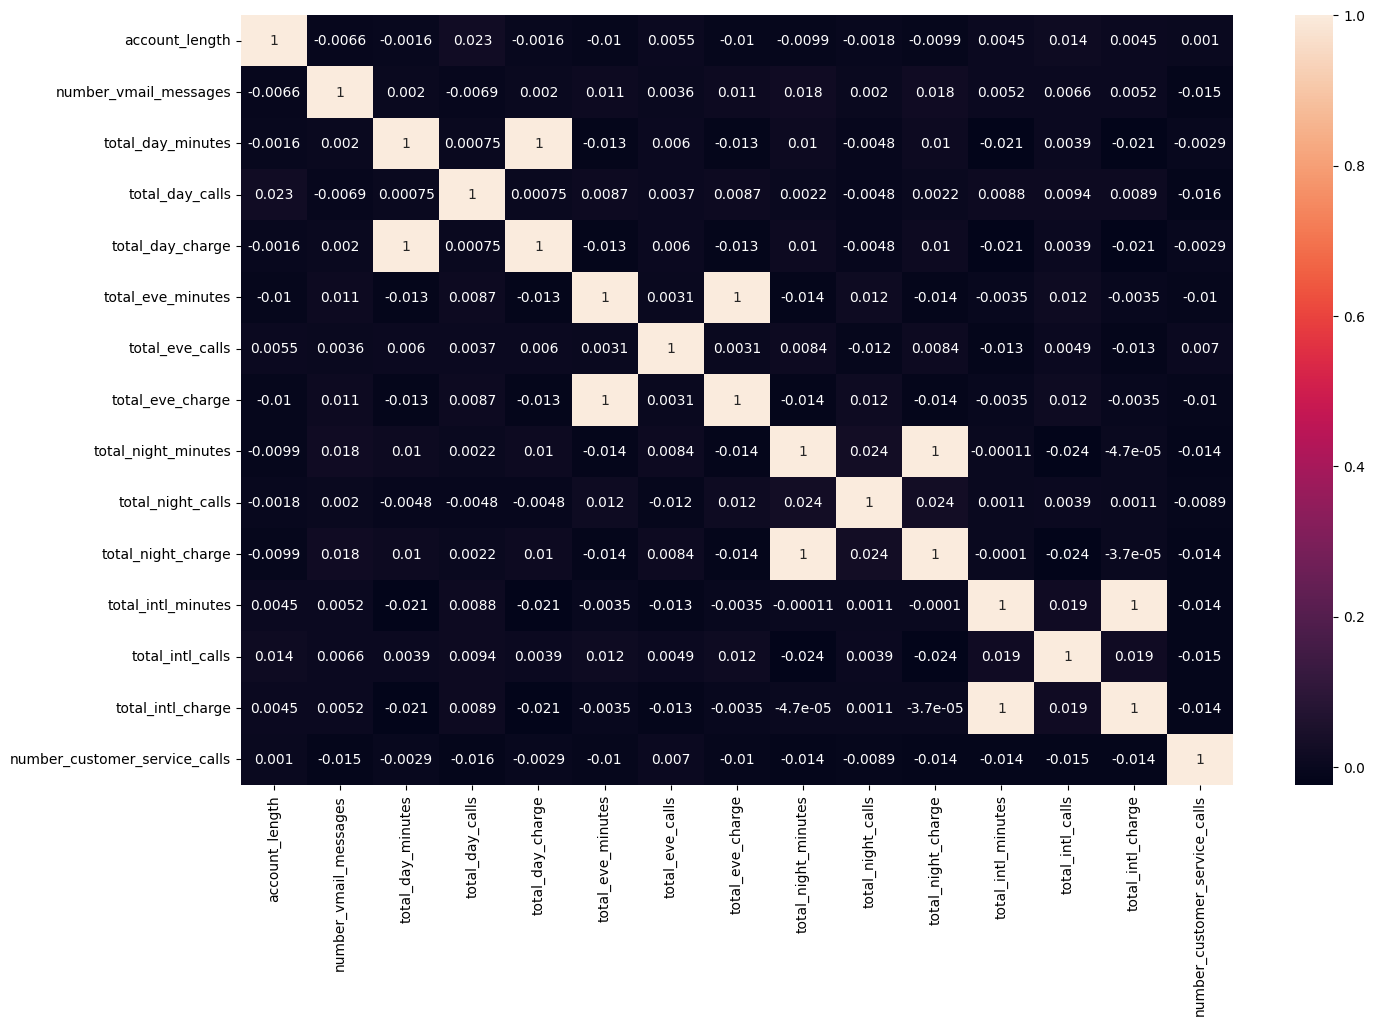

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(dt.corr(),annot=True)
plt.show()

In [ ]:
dtst['churn'] = dt['churn']

In [ ]:

# dt['churn'].map(d)
dtst['churn']

0       no
1       no
2       no
3       no
4       no
      ... 
745     no
746     no
747    yes
748     no
749    yes
Name: churn, Length: 750, dtype: category
Categories (2, object): ['no', 'yes']

In [ ]:
cate = dt.columns[dt.dtypes == 'category']

for i in cate:
    # print(i)
    # print(k)
    dt[i] = dt[i].cat.codes
    # dtst[k] = dtst[k].cat.codes



In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int8   
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int8   
 3   international_plan             4250 non-null   int8   
 4   voice_mail_plan                4250 non-null   int8   
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
cate0 = dtst.columns[dtst.dtypes == 'object'].tolist()
# cate0 = dtst.columns[dtst.dtypes == 'object']

for k in cate0:
    # print(i)
    # print(k)
    # dtst[k] = dtst[k].cat.codes
    dtst[k] = dtst[k].astype('category')

cate1 = dtst.columns[dtst.dtypes == 'category']
for k in cate1:
    # print(i)
    # print(k)
    dtst[k] = dtst[k].cat.codes

In [ ]:
dtst.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,16,128,1,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,2,1,118,2,1,0,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,3,12,62,1,0,0,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0
3,4,46,93,2,0,0,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,5,29,174,1,0,0,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


In [ ]:
dt.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


Scalling Test

In [ ]:
newDT = dt.drop(['churn','area_code'], axis = 1)
x_train = newDT
y_train = dt['churn']
newDTST = dtst.drop(['id','churn','area_code'], axis = 1)
x_test = newDTST

# y_test = dtst['churn']
y_test = dtst['churn']

In [ ]:
from imblearn.over_sampling import SMOTE
SMT = SMOTE()
x_train_balanced ,y_train_balanced = SMT.fit_resample(x_train, y_train)

In [ ]:
x_train_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7304 entries, 0 to 7303
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          7304 non-null   int8   
 1   account_length                 7304 non-null   int64  
 2   international_plan             7304 non-null   int8   
 3   voice_mail_plan                7304 non-null   int8   
 4   number_vmail_messages          7304 non-null   int64  
 5   total_day_minutes              7304 non-null   float64
 6   total_day_calls                7304 non-null   int64  
 7   total_day_charge               7304 non-null   float64
 8   total_eve_minutes              7304 non-null   float64
 9   total_eve_calls                7304 non-null   int64  
 10  total_eve_charge               7304 non-null   float64
 11  total_night_minutes            7304 non-null   float64
 12  total_night_calls              7304 non-null   i

In [ ]:
y_train_balanced.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7304 entries, 0 to 7303
Series name: churn
Non-Null Count  Dtype
--------------  -----
7304 non-null   int8 
dtypes: int8(1)
memory usage: 7.3 KB


#Model **function**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
def prediction(classification_models, features, comparison):
    ''' Here we are going to fit our train data by passing 
        to the funtion predct_func and predict our X_test 
        data which is our new test cases here and it will result 
        out classification-report and all the error metrics of the
        particular model used here.
    ''' 
    # Fitting Model
    classification_models.fit(features, comparison)
    # Predict new test cases
    predicted_vals = classification_models.predict(x_test)
    # Lets apply K-Fold Croos Validatiion CV=10
    KVC = cross_val_score(estimator=classification_models, X=features, y=comparison,cv=10)
    KFoldCross_Accuracies = KVC.mean()
    print('K Fold Crossvalidation Accuracy------->', KFoldCross_Accuracies)
    print()
    # Generates the classification report of the model
    print("__________________Classification Report__________________")
    print()
    class_report = classification_report(y_test,predicted_vals)
    print(class_report)
    # Generate the Confusion Matrix of the Model
    print("__________________Confusion Matrix__________________")
    print()
    CM = confusion_matrix(y_test, predicted_vals)
    print(CM)

In [ ]:
def evaluation(actual_vals, prediction_vals):
    ''' Function for evaluation of error metrics
        generates confusion matrix and results out
        False Positive Rate, False Negative Rate, 
        Sensitivity/TruePositiveRate/Recall & 
        specificity/TrueNegativeRate of models
    '''
    
    CM = pd.crosstab(actual_vals, prediction_vals)
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    print()
    # Lets evaluate Error Metrics of the model algorithms
    print("<---------------ERROR METRICS-------------->")
    print()
    # False Negative Rate
    print("False Negative Rate-------------->",  (FN*100)/(FN+TP))
    print()
    # False Positive Rate
    print("False Positive Rate-------------->",  (FP*100)/(FP+TN))
    print()
    # Sensitivity
    print("Sensitivity/TPR/Recall----------->",  (TP*100)/(TP+FN))
    print()
    # Specificity
    print("Specificity/TNR------------------>",  (TN*100)/(TN+FP))

Decision Tree

In [ ]:
DT_Model = DecisionTreeClassifier(criterion='entropy',random_state=100)
prediction(DT_Model, x_train_balanced, y_train_balanced)

K Fold Crossvalidation Accuracy-------> 0.8734926821955288

__________________Classification Report__________________

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       655
           1       0.13      0.24      0.17        95

    accuracy                           0.69       750
   macro avg       0.50      0.50      0.49       750
weighted avg       0.78      0.69      0.73       750

__________________Confusion Matrix__________________

[[498 157]
 [ 72  23]]


In [ ]:
DT_Predictions = DT_Model.predict(x_test)

In [ ]:
evaluation(y_test, DT_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 75.78947368421052

False Positive Rate--------------> 23.96946564885496

Sensitivity/TPR/Recall-----------> 24.210526315789473

Specificity/TNR------------------> 76.03053435114504


K-Nearest Neighbours

In [ ]:
KNN_Model = KNeighborsClassifier(n_neighbors=4)
prediction(KNN_Model, x_train_balanced, y_train_balanced)

K Fold Crossvalidation Accuracy-------> 0.8812960290838221

__________________Classification Report__________________

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       655
           1       0.17      0.34      0.22        95

    accuracy                           0.70       750
   macro avg       0.53      0.55      0.52       750
weighted avg       0.80      0.70      0.74       750

__________________Confusion Matrix__________________

[[494 161]
 [ 63  32]]


In [ ]:
KNN_Predictions = KNN_Model.predict(x_test)

In [ ]:
evaluation(y_test, KNN_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 68.42105263157895

False Positive Rate--------------> 24.580152671755727

Sensitivity/TPR/Recall-----------> 31.57894736842105

Specificity/TNR------------------> 75.41984732824427


Naive-Bayes_Gaussian

In [ ]:
NB_Model  = GaussianNB()
prediction(NB_Model, x_train_balanced, y_train_balanced)

K Fold Crossvalidation Accuracy-------> 0.7115255888911793

__________________Classification Report__________________

              precision    recall  f1-score   support

           0       0.89      0.58      0.70       655
           1       0.14      0.49      0.22        95

    accuracy                           0.57       750
   macro avg       0.52      0.54      0.46       750
weighted avg       0.79      0.57      0.64       750

__________________Confusion Matrix__________________

[[377 278]
 [ 48  47]]


In [ ]:
NB_Predictions = NB_Model.predict(x_test)

In [ ]:
evaluation(y_test, NB_Predictions)


<---------------ERROR METRICS-------------->

False Negative Rate--------------> 50.526315789473685

False Positive Rate--------------> 42.44274809160305

Sensitivity/TPR/Recall-----------> 49.473684210526315

Specificity/TNR------------------> 57.55725190839695


,importance,k
5,0.162789,total_day_minutes
10,0.092083,total_eve_charge
17,0.091386,number_customer_service_calls
7,0.069530,total_day_charge
3,0.058306,voice_mail_plan


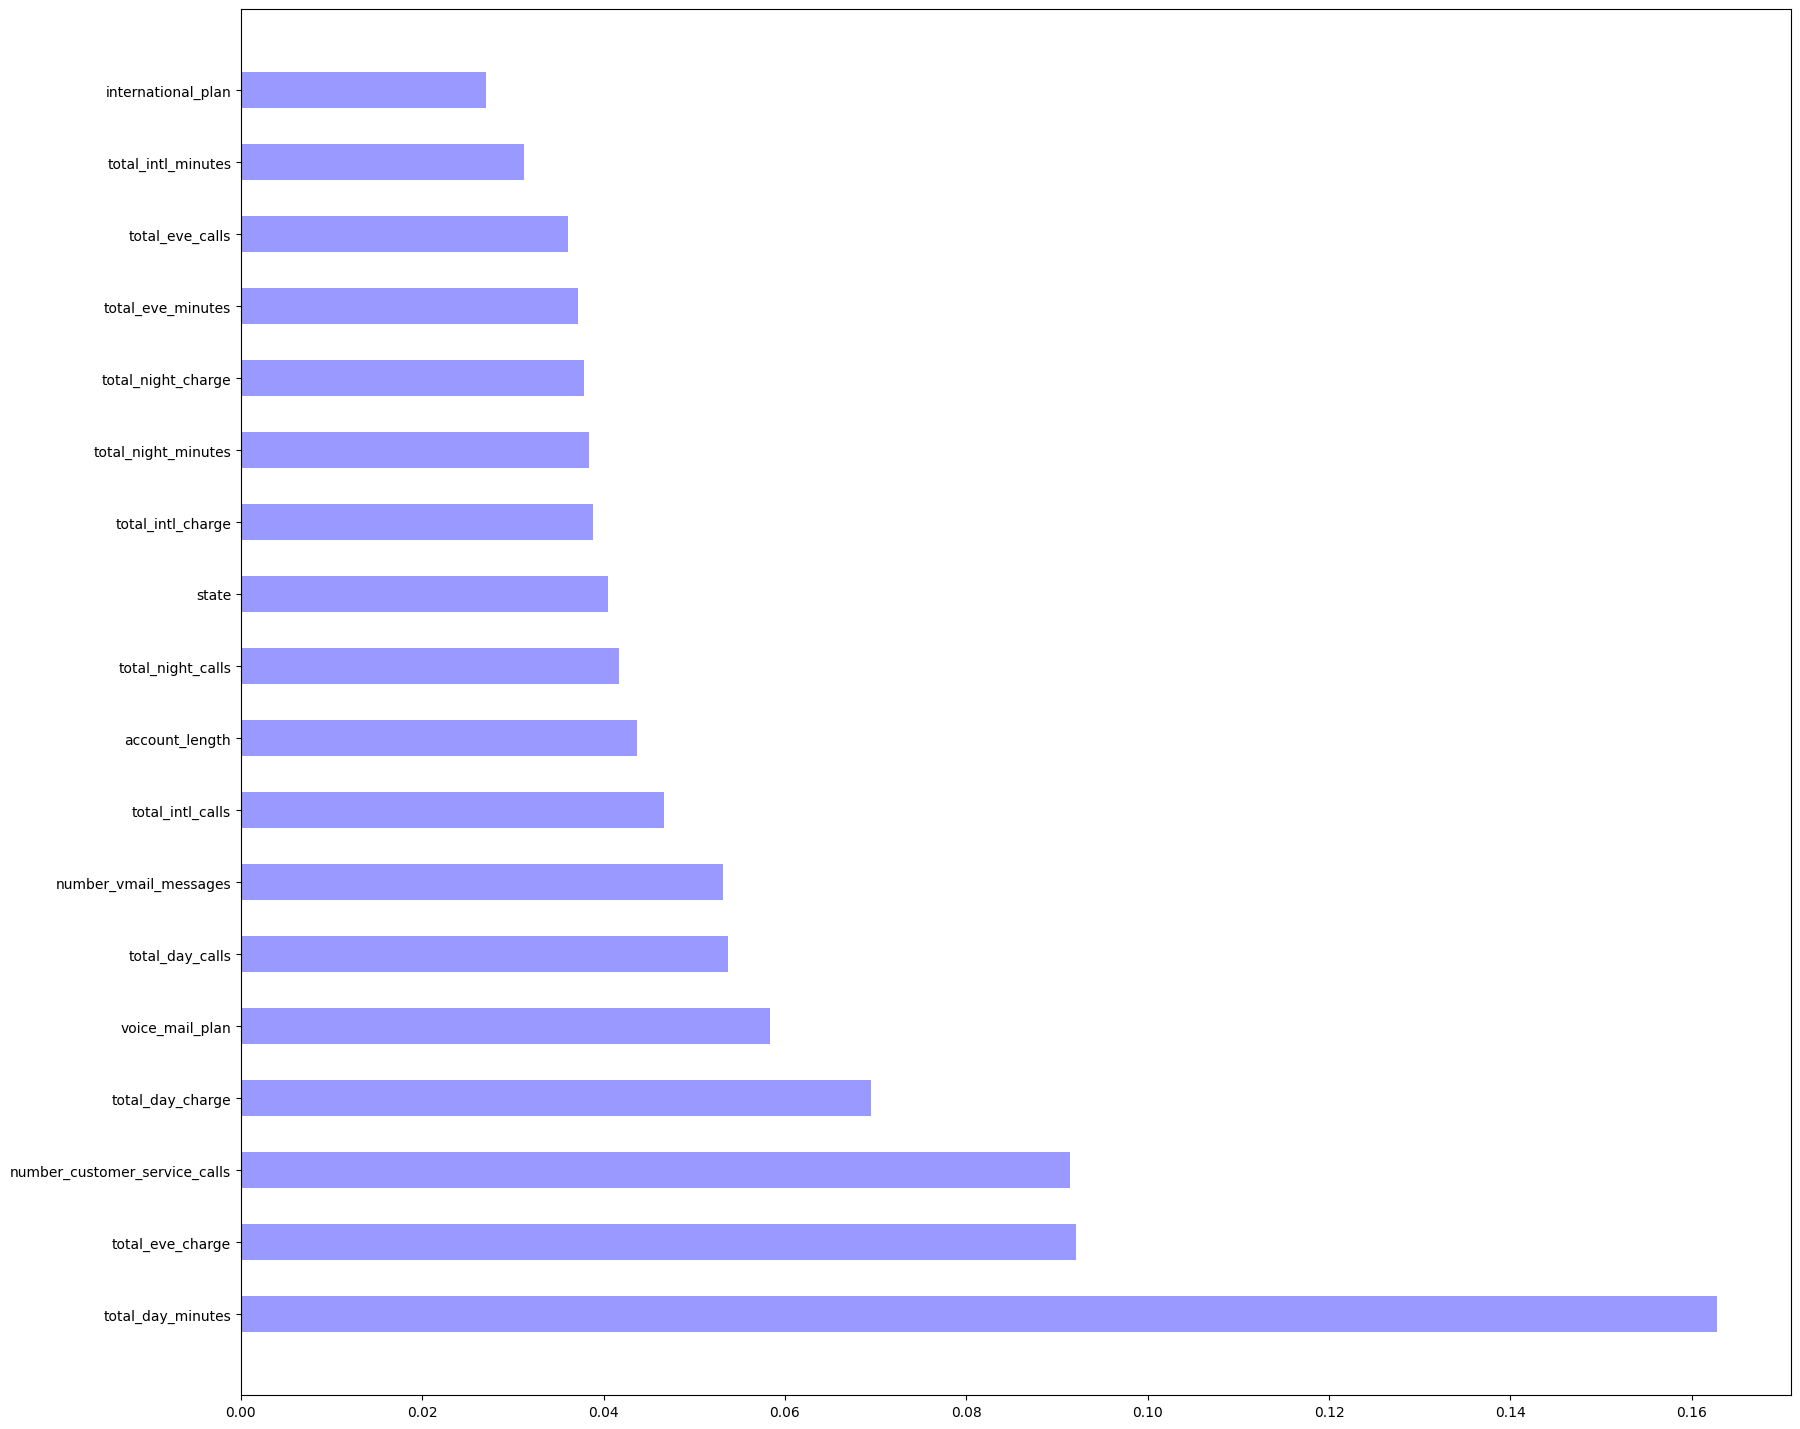

In [ ]:
mostfeat = dt.drop(['churn','area_code'], axis=1).columns
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)
FI = pd.DataFrame(DT_Model.feature_importances_, columns=["importance"])
FI['k'] = mostfeat
FI.sort_values("importance", inplace=True, ascending=False)
display(FI.head(5))
index = np.arange(len(DT_Model.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , FI["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, FI['k'])
plt.show()